# Project Overview

# Background
Water access is a critical issue in Tanzania, affecting millions of people. Despite significant investments in water infrastructure, many communities still face challenges in accessing clean and reliable water. The functionality of water pumps plays a crucial role in ensuring that communities have continuous access to this vital resource. However, a significant number of water pumps become non-functional over time due to various reasons such as poor maintenance, environmental conditions, and lack of resources.

# Business Understanding:
Many water pumps in Tanzania are non-functional, leading to reduced access to clean water. Predicting pump functionality can help in timely maintenance and resource allocation and predicting pump functionality, the stakeholders can ensure better maintenance, leading to improved water access and health outcomes.

# Loading and Merging the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
df1 = pd.read_csv(r"C:\Users\ADMIN\Documents\phase3 data science project\0bf8bc6e-30d0-4c50-956a-603fc693d966.csv")
df1


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [3]:
df2 = pd.read_csv(r"C:\Users\ADMIN\Documents\phase3 data science project\702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv")
df2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [4]:
df3 = pd.read_csv(r"C:\Users\ADMIN\Documents\phase3 data science project\4910797b-ee55-40a7-8668-10efd5c1b960.csv")
df3

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [5]:
# Merge datasets on the 'id' column
df = pd.merge(pd.merge(df1, df2, on='id', how='outer'), df3, on='id', how='outer')
df.head()

,id,status_group,amount_tsh_x,date_recorded_x,funder_x,gps_height_x,installer_x,longitude_x,latitude_x,wpt_name_x,...,payment_type_y,water_quality_y,quality_group_y,quantity_y,quantity_group_y,source_y,source_type_y,source_class_y,waterpoint_type_y,waterpoint_type_group_y
0,69572,functional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


# Data Understanding


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 74249
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       74250 non-null  int64  
 1   status_group             59400 non-null  object 
 2   amount_tsh_x             14850 non-null  float64
 3   date_recorded_x          14850 non-null  object 
 4   funder_x                 13981 non-null  object 
 5   gps_height_x             14850 non-null  float64
 6   installer_x              13973 non-null  object 
 7   longitude_x              14850 non-null  float64
 8   latitude_x               14850 non-null  float64
 9   wpt_name_x               14850 non-null  object 
 10  num_private_x            14850 non-null  float64
 11  basin_x                  14850 non-null  object 
 12  subvillage_x             14751 non-null  object 
 13  region_x                 14850 non-null  object 
 14  region_code_x         

In [7]:
#Checking for missing values
print(df.isnull().sum())

id                             0
status_group               14850
amount_tsh_x               59400
date_recorded_x            59400
funder_x                   60269
                           ...  
source_y                   14850
source_type_y              14850
source_class_y             14850
waterpoint_type_y          14850
waterpoint_type_group_y    14850
Length: 80, dtype: int64


In [8]:
# Replace zero values in latitude, longitude, and gps_height with NaN
df['gps_height_x'].replace(0, pd.NA, inplace=True)
df['longitude_x'].replace(0, pd.NA, inplace=True)
df['latitude_x'].replace(0, pd.NA, inplace=True)

In [9]:
# Fill missing categorical values with the mode
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Fill missing numerical values with the median
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)


# Feature Engineering:

In [10]:
# Convert date_recorded to datetime
df['date_recorded_y'] = pd.to_datetime(df['date_recorded_y'])

# Create a new column for the age of the pump
df['pump_age'] = df['date_recorded_y'].dt.year - df['construction_year_y']
df['pump_age'].replace({-pd.NA: pd.NA}, inplace=True)

In [11]:
# Drop columns that won't be used for modeling
df.drop(['id', 'wpt_name_x', 'num_private_x', 'recorded_by_x', 'scheme_name_x', 'date_recorded_x'], axis=1, inplace=True)


In [12]:
# The updated dataframe
print(df.head())

     status_group  amount_tsh_x                funder_x  gps_height_x  \
0      functional           0.0  Government Of Tanzania        1165.0   
1      functional           0.0  Government Of Tanzania        1165.0   
2      functional           0.0  Government Of Tanzania        1165.0   
3  non functional           0.0  Government Of Tanzania        1165.0   
4      functional           0.0  Government Of Tanzania        1165.0   

  installer_x  longitude_x  latitude_x        basin_x subvillage_x   region_x  \
0         DWE    35.011381    -5.04975  Lake Victoria      Shuleni  Shinyanga   
1         DWE    35.011381    -5.04975  Lake Victoria      Shuleni  Shinyanga   
2         DWE    35.011381    -5.04975  Lake Victoria      Shuleni  Shinyanga   
3         DWE    35.011381    -5.04975  Lake Victoria      Shuleni  Shinyanga   
4         DWE    35.011381    -5.04975  Lake Victoria      Shuleni  Shinyanga   

   ...  water_quality_y  quality_group_y    quantity_y quantity_group_y  \

# Exploratory Data Analysis (EDA)
Visualizing the data to gain insights into the distribution and relationships.

In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 74249
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   status_group             74250 non-null  object        
 1   amount_tsh_x             74250 non-null  float64       
 2   funder_x                 74250 non-null  object        
 3   gps_height_x             74250 non-null  float64       
 4   installer_x              74250 non-null  object        
 5   longitude_x              74250 non-null  float64       
 6   latitude_x               74250 non-null  float64       
 7   basin_x                  74250 non-null  object        
 8   subvillage_x             74250 non-null  object        
 9   region_x                 74250 non-null  object        
 10  region_code_x            74250 non-null  float64       
 11  district_code_x          74250 non-null  float64       
 12  lga_x                    74250 n

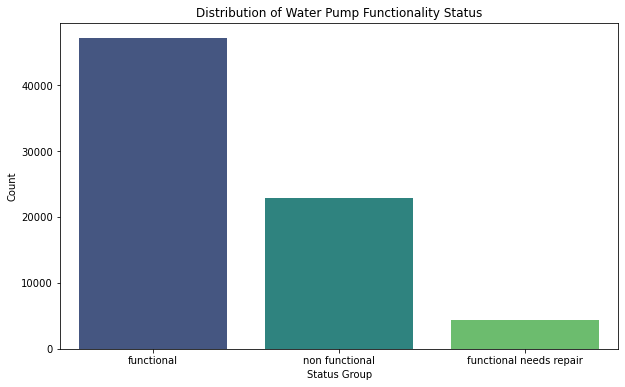

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#Distribution of water pump functionality status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='status_group', palette='viridis')
plt.title('Distribution of Water Pump Functionality Status')
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.show()


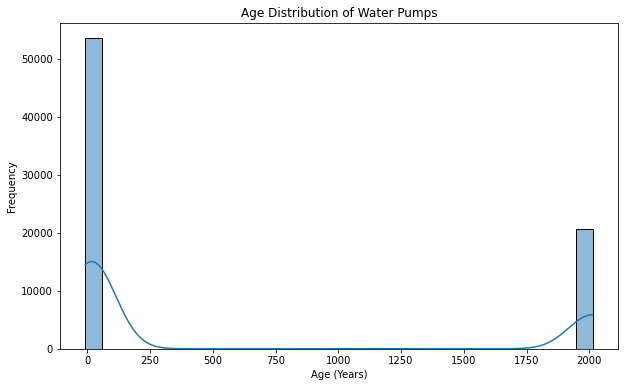

In [15]:
#Age distribution of water pumps
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='pump_age', kde=True, bins=30)
plt.title('Age Distribution of Water Pumps')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

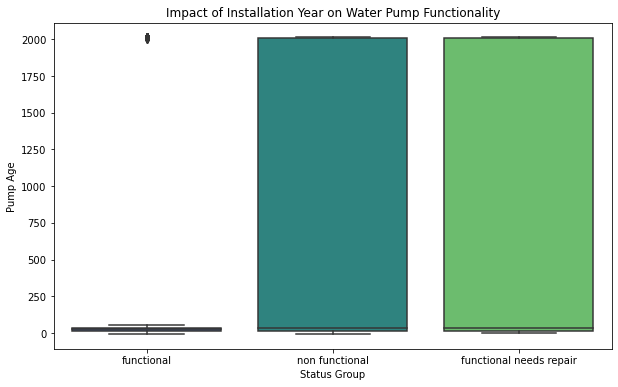

In [16]:
#Impact of installation year on functionality
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status_group', y='pump_age', palette='viridis')
plt.title('Impact of Installation Year on Water Pump Functionality')
plt.xlabel('Status Group')
plt.ylabel('Pump Age')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Sample the data to make it more manageable
#df = df.sample(frac=0.1, random_state=42)

# Split the data into features and target
X = df.drop(['status_group'], axis=1)
y = df['status_group']


categorical_features = X.select_dtypes(include=['object', 'bool']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Combine transformers into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Model Building and Evaluation
we will build and evaluate a RandomForestClassifier model.

In [18]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),('classifier', RandomForestClassifier(random_state=42))])

# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
classification_report(y_test, y_pred)

'                         precision    recall  f1-score   support\n\n             functional       0.87      0.93      0.90      9465\nfunctional needs repair       0.60      0.35      0.44       833\n         non functional       0.85      0.79      0.82      4552\n\n               accuracy                           0.86     14850\n              macro avg       0.77      0.69      0.72     14850\n           weighted avg       0.85      0.86      0.85     14850\n'

# Visualization of Feature Importances

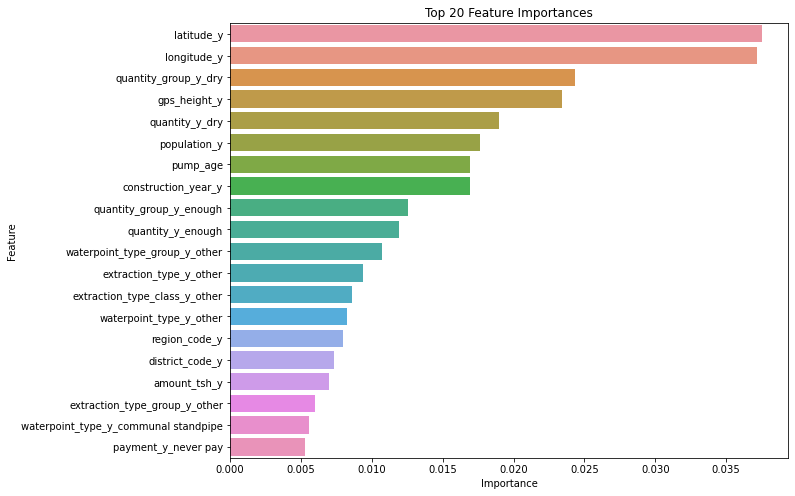

In [19]:
# Get feature importances from the random forest model
importances = model.named_steps['classifier'].feature_importances_
feature_names = preprocessor.transformers_[0][2].tolist() + \
                list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features))

# Create a dataframe for the feature importances
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot the top 20 feature importances
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances.head(20), x='importance', y='feature')
plt.title('Top 20 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

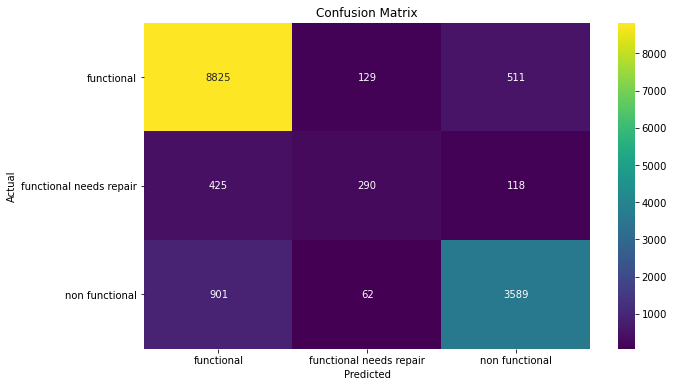

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Precision, Recall, and F1-Score
Functional Class:
>Precision (0.87): Out of all instances predicted as functional, 87% were correctly classified.
>Recall (0.93): Out of all actual functional pumps, 93% were correctly classified by the model.
>F1-Score (0.90): The harmonic mean of precision and recall for the functional class is 90%.

Functional Needs Repair Class:
>Precision (0.60): 60% of instances predicted as needing repair were correctly classified.
>Recall (0.35): Only 35% of actual pumps needing repair were correctly classified by the model.
>F1-Score (0.44): The F1-Score, which balances precision and recall, for this class is 44%.

Non-Functional Class:
>Precision (0.85): 85% of instances predicted as non-functional were correctly classified.
>Recall (0.79): 79% of actual non-functional pumps were correctly classified by the model.
>F1-Score (0.82): The F1-Score for the non-functional class is 82%.

# Recommedations and Conclusion
To improve the performance and reliability of water pumps across Tanzania, consider the following:

1. Site Selection and Installation
Geographical and Environmental Factors:
>Elevation and Terrain: Install pumps in areas where the geographical features do not pose a risk of flooding or excessive wear due to rough terrain.
>Soil Quality: Ensure the soil around the installation site is stable and not prone to erosion or landslides.
>Water Table Levels: Select sites with a stable and sufficient water table to ensure continuous water availability.

2. Regular Maintenance and Monitoring
>Scheduled Maintenance: Implement a routine maintenance schedule to check and service pumps regularly, preventing minor issues from becoming major problems.
>Remote Monitoring Systems: Utilize remote monitoring technology to track pump performance in real-time, enabling quick response to any emerging issues.

3. Data-Driven Decision Making
>Data Collection: Continuously collect data on pump performance, environmental conditions, and usage patterns.
>Predictive Analytics: Use machine learning models to predict potential failures and plan proactive maintenance.

4. Quality of Materials and Installation Practices
>High-Quality Materials: Use durable materials for pump components to reduce wear and tear and increase longevity.
>Skilled Labor: Ensure that the installation is carried out by skilled technicians to prevent early failures due to poor workmanship.

# Factors to Consider for Best Results on Pump Performance and Reliability

1.Pump Type and Specifications:
Choose pump types that are suited to the specific needs and conditions of the area (e.g., hand pumps for shallow wells, submersible pumps for deep wells).

2.Water Quality and Source Protection:
Ensure that the water source is protected from contamination and that the pump is equipped to handle the specific water quality (e.g., pumps resistant to corrosion for saline water).

3.Infrastructure and Accessibility:
Develop infrastructure around the pump site, such as access roads and storage facilities, to facilitate easy maintenance and repair work.

4.Environmental Impact Assessment:
Conduct thorough environmental impact assessments before installation to ensure that the pump does not adversely affect local ecosystems.
